# Setup, Extraction, Cleaning, Transformation

Import libraries to be used

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
#sns.set(style="darkgrid")
from pandas_profiling import ProfileReport
import math
import scipy.stats


Retrieve and read in dataset.

In [2]:
url = (r'https://data.sba.gov/dataset/8aa276e2-6cab-4f86-aca4-a7dde42adf24/resource/809345ac-f85d-487e-b07b-f9a34064564d/download/public_up_to_150k_12_220102.csv')
ppp_data = pd.read_csv(url)

View columns.

In [3]:
pd.set_option('display.max_columns', None)

ppp_data.head()           

,LoanNumber,DateApproved,SBAOfficeCode,ProcessingMethod,BorrowerName,BorrowerAddress,BorrowerCity,BorrowerState,BorrowerZip,LoanStatusDate,LoanStatus,Term,SBAGuarantyPercentage,InitialApprovalAmount,CurrentApprovalAmount,UndisbursedAmount,FranchiseName,ServicingLenderLocationID,ServicingLenderName,ServicingLenderAddress,ServicingLenderCity,ServicingLenderState,ServicingLenderZip,RuralUrbanIndicator,HubzoneIndicator,LMIIndicator,BusinessAgeDescription,ProjectCity,ProjectCountyName,ProjectState,ProjectZip,CD,JobsReported,NAICSCode,Race,Ethnicity,UTILITIES_PROCEED,PAYROLL_PROCEED,MORTGAGE_INTEREST_PROCEED,RENT_PROCEED,REFINANCE_EIDL_PROCEED,HEALTH_CARE_PROCEED,DEBT_INTEREST_PROCEED,BusinessType,OriginatingLenderLocationID,OriginatingLender,OriginatingLenderCity,OriginatingLenderState,Gender,Veteran,NonProfit,ForgivenessAmount,ForgivenessDate
0,6214548307,01/26/2021,304,PPS,BEDFORD FAMILY URGENT CARE INC.,1368 American Way,Bedford,VA,24523-2940,09/17/2021,Paid in Full,60,100,88459.95,88459.95,0.0,NaN,447640,Select Bank,211 Gristmill Dr,FOREST,VA,24551-2605,R,Y,N,Existing or more than 2 years old,Bedford,BEDFORD,VA,24523-2940,VA-05,7.0,621111.0,Unanswered,Unknown/NotStated,NaN,88459.95,NaN,NaN,NaN,NaN,NaN,Subchapter S Corporation,447640,Select Bank,FOREST,VA,Unanswered,Unanswered,NaN,88898.61,08/06/2021
1,3199818509,02/23/2021,304,PPS,WHITE ELECTRICAL SERVICES LLC,2431 Bluff Rd,Roanoke,VA,24014-3903,NaN,Exemption 4,60,100,88453.30,88453.30,0.0,NaN,73215,American National Bank and Trust Company,628 Main St,DANVILLE,VA,24541-1320,U,N,N,Existing or more than 2 years old,Roanoke,ROANOKE,VA,24014-3903,VA-06,10.0,238210.0,Unanswered,Unknown/NotStated,NaN,88453.30,NaN,NaN,NaN,NaN,NaN,Limited Liability Company(LLC),73215,American National Bank and Trust Company,DANVILLE,VA,Unanswered,Unanswered,NaN,89151.10,12/07/2021
2,5012337108,04/13/2020,304,PPP,SOUTH BOSTON HARDWARE & POWER EQUIPMENT INC,307 Broad Street,SOUTH BOSTON,VA,24592-4611,02/20/2021,Paid in Full,24,100,88445.58,88445.58,0.0,NaN,73481,Benchmark Community Bank,204 S Broad St,KENBRIDGE,VA,23944,R,Y,N,Existing or more than 2 years old,SOUTH BOSTON,HALIFAX,VA,24592-4611,VA-05,13.0,444130.0,Unanswered,Unknown/NotStated,11055.69,66334.20,11055.69,NaN,NaN,NaN,NaN,Corporation,73481,Benchmark Community Bank,KENBRIDGE,VA,Unanswered,Unanswered,NaN,89094.99,01/14/2021
3,5288047410,05/12/2020,304,PPP,COMPLETE CONTRACTING LLC,PO Box 39,Sutherland,VA,23885,06/17/2021,Paid in Full,24,100,88445.00,88445.00,0.0,NaN,225134,Truist Bank d/b/a Branch Banking & Trust Co,214 N Tryon St,CHARLOTTE,NC,28202-1078,R,N,N,Existing or more than 2 years old,Sutherland,DINWIDDIE,VA,23885-0001,VA-04,11.0,531110.0,Unanswered,Unknown/NotStated,NaN,88445.00,NaN,NaN,NaN,NaN,NaN,Limited Liability Company(LLC),225134,Truist Bank d/b/a Branch Banking & Trust Co,CHARLOTTE,NC,Unanswered,Unanswered,NaN,89356.47,05/25/2021
4,1687107207,04/15/2020,304,PPP,"NORTON TRACT & ROLLER, INC",1509 MAIN AVE PO Box 566,NORTON,VA,24273-2209,01/07/2021,Paid in Full,24,100,88437.90,88437.90,0.0,NaN,123348,"New Peoples Bank, Inc.",53 Commerce Dr,HONAKER,VA,24260,U,N,Y,Existing or more than 2 years old,NORTON,NORTON CITY,VA,24273-2209,VA-09,16.0,811310.0,Unanswered,Unknown/NotStated,NaN,88437.90,NaN,NaN,NaN,NaN,NaN,Corporation,123348,"New Peoples Bank, Inc.",HONAKER,VA,Unanswered,Unanswered,NaN,89037.31,12/28/2020


Drop unwanted columns

In [4]:
drop_columns = ['DateApproved','SBAOfficeCode',
                    'ProcessingMethod','BorrowerName',
                    'BorrowerAddress','BorrowerCity',
                    'BorrowerState','BorrowerZip', 
                    'ServicingLenderLocationID', 'ServicingLenderName',
                    'ServicingLenderAddress','ServicingLenderCity',
                    'ServicingLenderState','ServicingLenderZip',
                    'RuralUrbanIndicator','HubzoneIndicator',
                    'LMIIndicator', 'ProjectCity',
                    'ProjectCountyName','ProjectState',
                    'ProjectState', 'ProjectZip','CD',
                    'NAICSCode', 'Race','Ethnicity',
                    'OriginatingLenderLocationID', 'OriginatingLender',
              'OriginatingLenderCity', 'OriginatingLenderState',
              'Gender', 'Veteran', 'LoanStatusDate', 'Term','SBAGuarantyPercentage',
               'FranchiseName', 'UTILITIES_PROCEED','PAYROLL_PROCEED',
                'MORTGAGE_INTEREST_PROCEED', 'RENT_PROCEED',  
                  'REFINANCE_EIDL_PROCEED', 'HEALTH_CARE_PROCEED',
               'DEBT_INTEREST_PROCEED','ForgivenessAmount', 'ForgivenessDate',
                'UndisbursedAmount', 'BusinessAgeDescription','BusinessType']

ppp_data.drop(columns=drop_columns, inplace=True)

In [5]:
ppp_data.head()

,LoanNumber,LoanStatus,InitialApprovalAmount,CurrentApprovalAmount,JobsReported,NonProfit
0,6214548307,Paid in Full,88459.95,88459.95,7.0,NaN
1,3199818509,Exemption 4,88453.30,88453.30,10.0,NaN
2,5012337108,Paid in Full,88445.58,88445.58,13.0,NaN
3,5288047410,Paid in Full,88445.00,88445.00,11.0,NaN
4,1687107207,Paid in Full,88437.90,88437.90,16.0,NaN


In [6]:
ppp_data.shape

(601263, 6)

There are 601,263 rows and 6 columns/categories.

In [ ]:
ppp_data.index.values

In [7]:
ppp_data.describe()


,LoanNumber,InitialApprovalAmount,CurrentApprovalAmount,JobsReported
count,6.012630e+05,6.012630e+05,601263.000000,601262.000000
mean,5.490254e+09,2.758323e+04,27381.199575,4.138129
std,2.557651e+09,3.673778e+04,28421.026002,8.166428
min,1.000027e+09,1.000000e+00,1.800000,0.000000
25%,3.319608e+09,8.607160e+03,8617.000000,1.000000
50%,5.470039e+09,1.940000e+04,19442.000000,2.000000
75%,7.654333e+09,3.365928e+04,33600.000000,5.000000
max,9.999009e+09,9.375000e+06,149999.990000,500.000000


In [8]:
ppp_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601263 entries, 0 to 601262
Data columns (total 6 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   LoanNumber             601263 non-null  int64  
 1   LoanStatus             601263 non-null  object 
 2   InitialApprovalAmount  601263 non-null  float64
 3   CurrentApprovalAmount  601263 non-null  float64
 4   JobsReported           601262 non-null  float64
 5   NonProfit              17919 non-null   object 
dtypes: float64(3), int64(1), object(2)
memory usage: 27.5+ MB


The following issues should be looked into or corrected:

* See if initial approval amount and curent approval amount are the same
* Jobs reported should be an integer which can't be changed until null value is resolved. .
* See what values are for NonProfit column due to several null values
* Finalize what columns to keep.

In [9]:
#See if Initial Approval Amount are the same as Current Approval Amounts
ppp_data['InitialApprovalAmount'].equals(ppp_data['CurrentApprovalAmount'])

False

This means there were some changes in initial approval amounts and current approval amounts.

In [10]:
ppp_data.InitialApprovalAmount.compare(ppp_data.CurrentApprovalAmount)

,self,other
14,91500.00,88400.00
55,88000.00,88300.00
63,88272.00,88272.16
81,67400.00,88200.00
82,88300.00,88200.00
...,...,...
601035,2072.00,1072.00
601043,917.29,1053.12
601182,10300.00,700.00
601183,40000.00,700.00


There appears to be changes with 17,276 of the rows. This is a small amount compared to the data set as a whole. Although this would be interesting to look at in further detail, we're going to choose to look at the current approval amounts with, the assumption that the entries are accurate.

Now to remove the null value from JobsReported

In [11]:
#Drop row with null from JobsReported
ppp_data.dropna(subset=['JobsReported'], inplace=True)

In [13]:
#check that null value was dropped
ppp_data.shape

(601262, 6)

Now, to see what values are in the NonProfit column

In [14]:
ppp_data['NonProfit'].value_counts()

Y    17919
Name: NonProfit, dtype: int64

The only value outside of the nulls is 'Y' for yes so, we'll assume all nulls mean no and change the values to 'N'.

In [15]:
# change NonProfit na values to 'N'
ppp_data['NonProfit'] = ppp_data['NonProfit'].fillna('N')

# check info
ppp_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 601262 entries, 0 to 601262
Data columns (total 6 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   LoanNumber             601262 non-null  int64  
 1   LoanStatus             601262 non-null  object 
 2   InitialApprovalAmount  601262 non-null  float64
 3   CurrentApprovalAmount  601262 non-null  float64
 4   JobsReported           601262 non-null  float64
 5   NonProfit              601262 non-null  object 
dtypes: float64(3), int64(1), object(2)
memory usage: 32.1+ MB


There are no longer any missing values in the data.

Then lets change the loan number as the index.

In [16]:
ppp_data.set_index('LoanNumber')

,LoanStatus,InitialApprovalAmount,CurrentApprovalAmount,JobsReported,NonProfit
LoanNumber,,,,,
6214548307,Paid in Full,88459.95,88459.95,7.0,N
3199818509,Exemption 4,88453.30,88453.30,10.0,N
5012337108,Paid in Full,88445.58,88445.58,13.0,N
5288047410,Paid in Full,88445.00,88445.00,11.0,N
1687107207,Paid in Full,88437.90,88437.90,16.0,N
...,...,...,...,...,...
9160347307,Paid in Full,260.00,260.00,1.0,N
8452318607,Exemption 4,256.45,256.45,2.0,N
5991058901,Exemption 4,250.00,250.00,1.0,N


Generate profile report

In [17]:


profile = ProfileReport(ppp_data)
#profile.to_file(output_file='output.html')
profile.to_widgets()

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

C:\Users\NewUser\anaconda3\lib\site-packages\scipy\stats\stats.py:4594: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

After reviewing the report, I saw that there were 25 cases with a loan status of active undisbursed. If they've been approved, they'll be kept.

In [18]:
#Filter out businesses that have active cases of undisbursed amounts
ls_data = ppp_data[(ppp_data['LoanStatus'] == 'Active Un-Disbursed')]
ls_data.shape

(25, 6)

In [19]:
ls_data

,LoanNumber,LoanStatus,InitialApprovalAmount,CurrentApprovalAmount,JobsReported,NonProfit
13636,8397908603,Active Un-Disbursed,59935.00,59935.00,29.0,Y
14674,5677968404,Active Un-Disbursed,58135.00,58135.00,7.0,N
17351,1877818510,Active Un-Disbursed,54112.00,54112.00,8.0,N
35415,4988738702,Active Un-Disbursed,35000.00,35000.00,11.0,N
63059,4197498303,Active Un-Disbursed,20833.00,20833.00,1.0,N
70779,2563708710,Active Un-Disbursed,20832.00,20832.00,1.0,N
71038,3495048704,Active Un-Disbursed,20832.00,20832.00,1.0,N
74468,9811528608,Active Un-Disbursed,20832.00,20832.00,1.0,N
86685,9440938602,Active Un-Disbursed,19097.00,19097.00,1.0,N
89695,1453537204,Active Un-Disbursed,18295.00,18295.00,2.0,Y


All of the businesses have been approved for some amount so, we'll keep them.

Now that the data has been observed and cleaned, we can get rid of the last of the columns we no longer need.

In [20]:
# drop columns
ppp_data.drop(columns=['InitialApprovalAmount', 'LoanStatus' ], inplace=True)

In [21]:
ppp_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 601262 entries, 0 to 601262
Data columns (total 4 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   LoanNumber             601262 non-null  int64  
 1   CurrentApprovalAmount  601262 non-null  float64
 2   JobsReported           601262 non-null  float64
 3   NonProfit              601262 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 22.9+ MB


The last task to be done before comparing nonprofits and all other businesses is to create two idependent datasets. One dataset with the nonprofits and the other that holds all other businesses not classified as nonprofits.

In [22]:
# Create nonprofit and other businesses dataset

nonpro = ppp_data[ppp_data['NonProfit'] == 'Y']

other_biz = ppp_data[ppp_data['NonProfit'] == 'N']

print('nonprofit shape:',nonpro.shape, 'other businesses shape:', other_biz.shape)

nonprofit shape: (17919, 4) other businesses shape: (583343, 4)


So, we'll be working with 17,919 non profits and 583,343 other businesses. This is interesting as the SBA states that nonprofits make up arount 10% of small businesses. 17,919 non profits is definitely not even close of the total amount of businesses used in this analysis. In fact, it's only about 3% of this data set. Interesting.

# Everyone Else vs Nonprofits

In this next part of this analysis, we want to explore these two samples. 
We'll be looking at the variables, JobsReported and Approval Amounts being represented in both samples. We'll then look at some statistical features of the data such as the central tendencies and variances of the two samples. This information should help in deciding which statistical test to choose to test whether nonprofits made significantly less than their counterparts.

In [23]:
nonpro.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 17919 entries, 6 to 600888
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LoanNumber             17919 non-null  int64  
 1   CurrentApprovalAmount  17919 non-null  float64
 2   JobsReported           17919 non-null  float64
 3   NonProfit              17919 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 700.0+ KB


In [24]:
other_biz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 583343 entries, 0 to 601262
Data columns (total 4 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   LoanNumber             583343 non-null  int64  
 1   CurrentApprovalAmount  583343 non-null  float64
 2   JobsReported           583343 non-null  float64
 3   NonProfit              583343 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 22.3+ MB


The data looks like it's all there. There are no missing values.

It is now time to start looking at the data with some graphs and plots.

Text(0.5, 1.0, 'All Other Businesses Current Approval Amount Correlation Heatmap')

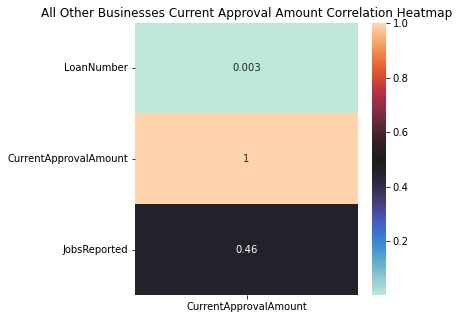

In [25]:
plt.figure(figsize=(5,5))
other_hmap = sns.heatmap(other_biz.corr()[['CurrentApprovalAmount']],annot=True, cmap ='icefire')
other_hmap.set_title('All Other Businesses Current Approval Amount Correlation Heatmap')

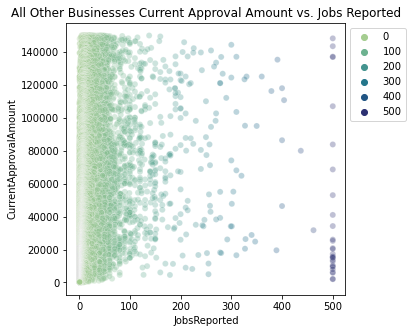

In [26]:
plt.figure(figsize=(5,5))

other_scatter = sns.scatterplot(data = other_biz, x = 'JobsReported', y = 'CurrentApprovalAmount', hue='JobsReported',palette='crest', alpha = .3)
other_scatter.set_title('All Other Businesses Current Approval Amount vs. Jobs Reported')
plt.legend(bbox_to_anchor=(1,1),loc='best')

There doesn't seem to be any strong correlations between JobsReported and CurrentApprovalAmount. Is this the same for NonProfits?

Text(0.5, 1.0, 'Nonprofits Current Approval Amount Correlation Heatmap')

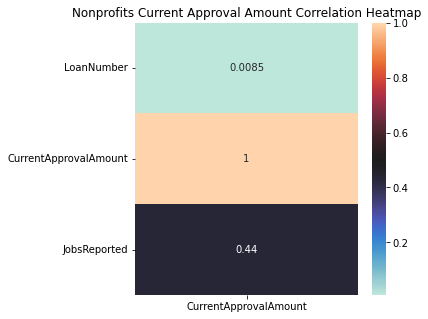

In [27]:
plt.figure(figsize=(5,5))
nonpro_hmap = sns.heatmap(nonpro.corr()[['CurrentApprovalAmount']],annot=True, cmap ='icefire')
nonpro_hmap.set_title('Nonprofits Current Approval Amount Correlation Heatmap')

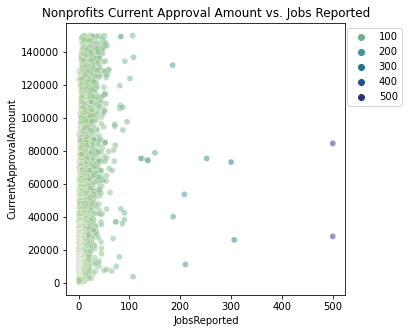

In [28]:
plt.figure(figsize=(5,5))
nonpro_scatter=sns.scatterplot(data = nonpro, x = 'JobsReported', y = 'CurrentApprovalAmount', hue='JobsReported', palette='crest', alpha = 0.5)
nonpro_scatter.set_title('Nonprofits Current Approval Amount vs. Jobs Reported')
plt.legend(bbox_to_anchor=(1.22,1))

We see here that the results are about the same. How many jobs businesses reported does not seem to factor into the loan amount a business was approved for. A business that reports 0-100 employees can make as much or as little as a company reporting 500 employees.

What about the approval amounts in general. Is any business getting the higher loan amounts? Did any nonprofits get the higher loan amounts?

Text(0.5, 1.0, 'All Other Businesses Current Approval Amounts')

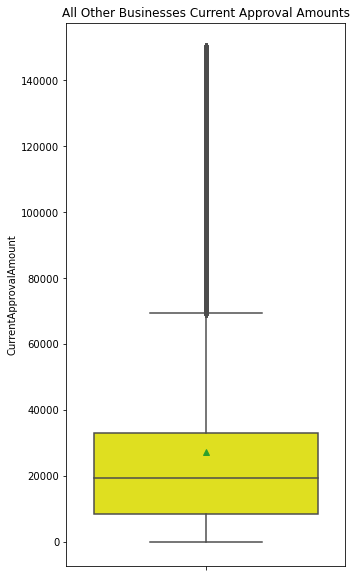

In [29]:
#Box plot for all businesses
plt.figure(figsize=(5,10))
other_box =sns.boxplot(y = other_biz['CurrentApprovalAmount'], showmeans = True, color ='yellow')
other_box.set_title('All Other Businesses Current Approval Amounts')



In [30]:
other_biz.describe()

,LoanNumber,CurrentApprovalAmount,JobsReported
count,5.833430e+05,583343.000000,583343.000000
mean,5.486926e+09,27094.773561,4.054837
std,2.557977e+09,28256.312477,8.076844
min,1.000027e+09,1.800000,0.000000
25%,3.313663e+09,8500.000000,1.000000
50%,5.465968e+09,19249.180000,2.000000
75%,7.651479e+09,32900.000000,5.000000
max,9.999009e+09,149999.990000,500.000000


In general about 75 percent of all businesses were approved for less than \\$32,900. 50 percent of borrowers received less than \\$19,249.However, the mean is \\$27,094. This data is skewed and any amount greater than about \\$70,000 is considered an outlier.

How did nonprofits fair?

Text(0.5, 1.0, 'Nonprofits Current Approval Amounts')

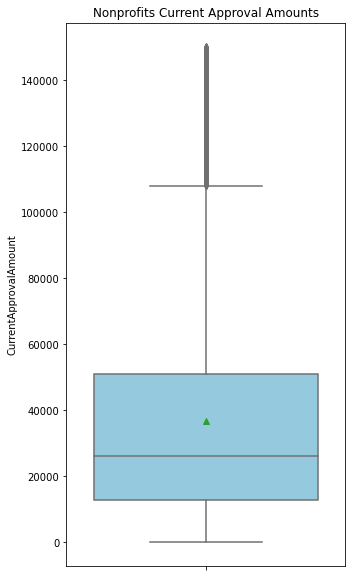

In [31]:
#Box plot for nonprofits
plt.figure(figsize=(5,10))

nonpro_box = sns.boxplot(y = nonpro['CurrentApprovalAmount'], showmeans = True, color = 'skyblue')
nonpro_box.set_title('Nonprofits Current Approval Amounts')

In [32]:
nonpro.describe()

,LoanNumber,CurrentApprovalAmount,JobsReported
count,1.791900e+04,17919.000000,17919.000000
mean,5.598605e+09,36702.553703,6.849657
std,2.544794e+09,31969.363675,10.319359
min,1.001147e+09,160.000000,1.000000
25%,3.536747e+09,12908.500000,2.000000
50%,5.630458e+09,26000.000000,4.000000
75%,7.742537e+09,51000.000000,8.000000
max,9.998648e+09,149982.000000,500.000000


Looking at the nonprofits from the sample, 75 percent made less than \\$51,000 but, 50 percent made less than \\$26,000. This data is also skewed as the mean amount that was approved is \\$36,702 which is greater than the median. Any amount over around \\$110,000 is considered an outlier. Nonprofits seem to have actually done better than their counterparts.

So, how skewed is this data?

Text(0.5, 1.0, 'All Other Businesses vs Non Profits Current Approval Amounts')

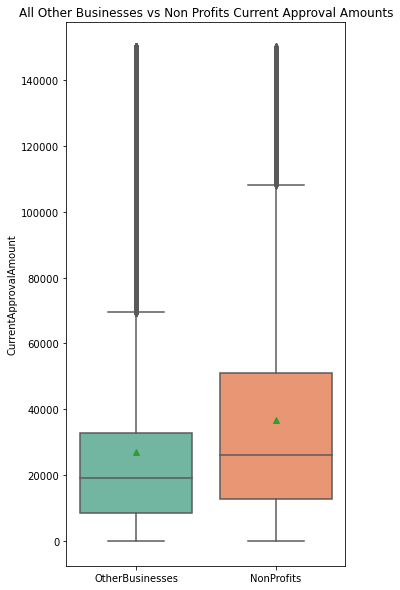

In [33]:
plt.figure(figsize=(5,10))
both_box = sns.boxplot(data=ppp_data, x ='NonProfit', y ='CurrentApprovalAmount',showmeans = True, palette= 'Set2' )
plt.xticks([0,1], ['OtherBusinesses', 'NonProfits'])
both_box.set(xlabel=None)
both_box.set_title('All Other Businesses vs Non Profits Current Approval Amounts')

Text(0.5, 1.0, 'Distribution of Other Businesses')

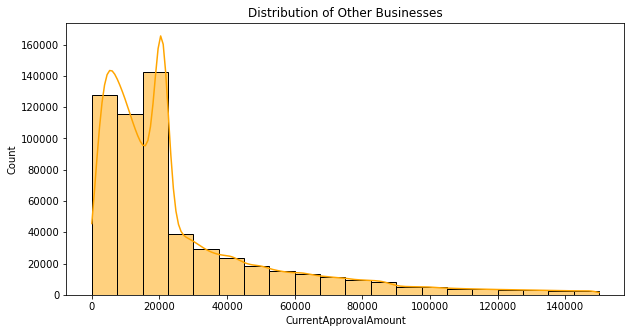

In [34]:
# Histogram for all businesses
plt.figure(figsize=(10,5))
other_hist =sns.histplot(data= other_biz, x = 'CurrentApprovalAmount', kde=True, bins=20, color='orange')
other_hist.set_title('Distribution of Other Businesses')

In [35]:
print('Skew:', other_biz['CurrentApprovalAmount'].skew(),'Kurtosis:', other_biz['CurrentApprovalAmount'].kurt())

Skew: 1.962692458872816 Kurtosis: 3.816861435048827


The data is highly skewed and doesn't follow a normal distribution. It also has a high amount of outliers. Let's see about the nonprofits next.

Text(0.5, 1.0, 'Distribution of Non Profits')

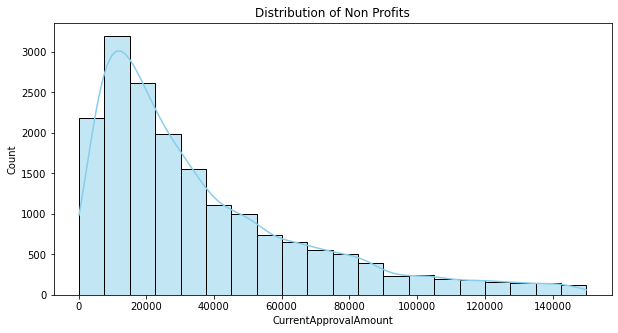

In [36]:
# Histogram for nonprofits
plt.figure(figsize=(10,5))
nonpro_hist=sns.histplot(data= nonpro, x = 'CurrentApprovalAmount', kde=True, bins=20, color = 'skyblue')
nonpro_hist.set_title('Distribution of Non Profits')

In [37]:
print('Skew:', nonpro['CurrentApprovalAmount'].skew(),'Kurtosis:', nonpro['CurrentApprovalAmount'].kurt())

Skew: 1.3767091605790844 Kurtosis: 1.430012635403528


Comparing the skewness of the nonprofits to all other businesses, it can be seen that nonprofits loan approval amounts are heavily skewed as well. However, there are less outliers than other businesses. It could be said that the amounts distributed to nonprofits were somewhat spead out more than the other businesses. The amounts for non profits also have a lesser degree of skewness than other businesses. 

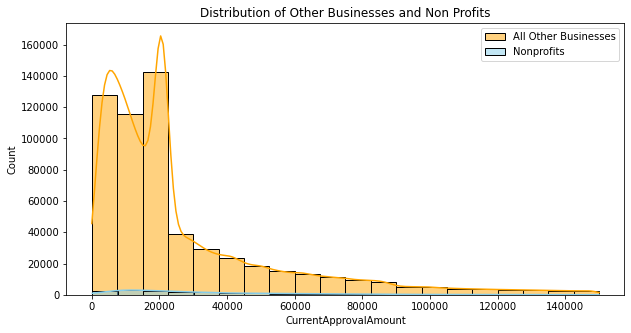

In [38]:
plt.figure(figsize=(10,5))
sns.histplot(other_biz, x = 'CurrentApprovalAmount', label ="All Other Businesses", kde=True, color ="orange", bins =20)
sns.histplot(nonpro, x = 'CurrentApprovalAmount', label = "Nonprofits", kde=True, color="skyblue", bins=20).set(title='Distribution of Other Businesses and Non Profits')
plt.legend()
plt.show()

Looking at this graph that displays the frequency counts of the approval amounts for all businesses is higher than nonprofits but that is expected because there were very few nonprofits when compared to the rest of the businesses. However, there does seem to be a difference in the shapes of the two distribution that can be seen with the individual plots and the plot with both samples represented. The amounts approved for nonprofits was distributed more in terms of some of the middle and higher loan amounts. 

The question that remains is, "Is this difference significant?"

## What now?

Due to the data being highly skewed typical statical analysis techniques such as Z-tests and T-tests may not be appropriate. It looks as if nonprofits did not receive less than all other businesses but, we're going to conduct a test on the medians to see if there is a significant difference with a sign test. The null hypothesis the median of nonprofits is greater than or equal to \\$19,249. The alternative hypothesis is the median of non profits is less than \\$19,249. Alpha for this test is set at .01.


# Testing For Significant Difference in Median Loan Amounts

In [39]:
# Sign Test for Nonprofits v Rest of Population

# Get all values above, below, equal to 19,249
positive = nonpro[nonpro['CurrentApprovalAmount']>19249]
negative = nonpro[nonpro['CurrentApprovalAmount']<19249]
zero = nonpro[nonpro['CurrentApprovalAmount']==19249]

print("positives:", len(positive))
print("negatives:", len(negative))
print("zeros:", len(zero))

# Get count for sample size (total # + and _)
n = len(positive) + len(negative)
print("n:", n)

# get x which in the minimum of the + and -
x = min(len(positive), len(negative))
print("x:", x)

# Determine critical valuex for this left-tailed test
# at alpha = 0.01
crit_val =scipy.stats.norm.ppf(.01)
print("critical value:", crit_val)

# Calculate test statistic z (approximation of p-value for binomial distribution)
# because sample greater than 25
z = ((x+0.5) -(n/2))/((math.sqrt(n)/2))
print("z:", z)

# Print results
if z < crit_val:
    print('Reject the null hypothesis.')
else:
    print('Fail to reject the null hypothesis.')

positives: 11006
negatives: 6913
zeros: 0
n: 17919
x: 6913
critical value: -2.3263478740408408
z: -30.56882462042061
Reject the null hypothesis.


## Results and Insights

The test statistic ended up being in the critical region because it was -30.569 and the critical value was -2.326.  We have to reject the null hypothesis at the 1% level of significance that nonprofits had a median >= \\$19,249.

The results don't seem to match my original hypothesis as many more nonprofits were approved for more than \\$19,249. In fact 11,006 of the 17,919 amounts in the sample were above \\$19,249 while only 6913 of the amounts were below. However, I can agree that there does seem to be a difference in the loan amount distribution between nonprofits and all other businesses. This can be seen from the various graphs and plots conducted earlier in this project. If all recipients were treated in the same manner, the distributions would be assumed to be closer in shape and range. The two sets of data look like they could be from two different samples.

Since this data leads to more questions further research would be advised such as:

* Looking at the difference between initial loan amounts vs. current. How many were lower or higher than requested?
* Looking at percentages of current loan amount averages or medians when compared
* Looking at business age description compared to loan amounts
*Evaluating if the types of businesses makes a difference in loan amounts
* ...and so much more!


# Sources

https://data.sba.gov/dataset/ppp-foia/resource/809345ac-f85d-487e-b07b-f9a34064564d?inner_span=True

https://stackoverflow.com/questions/68704002/importerror-cannot-import-name-abcindexclass-from-pandas-core-dtypes-generic

https://www.marketwatch.com/story/over-500000-businesses-got-ppp-loans-but-are-listed-as-retaining-zero-jobs-treasury-department-data-show-2020-07-08

https://www.chicagotribune.com/coronavirus/ct-ppp-loans-zero-jobs-retained-20200710-uyzhj32tkrgqtn5axyaz2zs3sm-story.html

https://www.latimes.com/politics/story/2021-04-01/taxpayers-may-never-know-how-many-jobs-the-1-trillion-ppp-saved-the-government-didnt-keep-count

https://elizabethdgroot.medium.com/practice-data-quality-with-python-numpy-and-pandas-da2053fb0114

https://stackoverflow.com/questions/45039937/python-pandas-select-rows-where-two-columns-are-not-equal

https://evergreensmallbusiness.com/are-one-person-s-corporations-illegal/

https://www.upcounsel.com/does-a-corporation-have-to-have-employees#:~:text=As%20distinct%20legal%20entities%2C%20corporations%20have%20a%20variety,once%20it%20has%20filed%20the%20Articles%20of%20Incorporation.

https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e

https://www.statology.org/z-critical-value-python/#:~:text=%20How%20to%20Find%20the%20Z%20Critical%20Value,test%2C%20there%20will%20be%20two%20critical...%20More%20

https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e

https://www.geeksforgeeks.org/how-to-plot-two-histograms-together-in-matplotlib/


https://www.statisticshowto.com/probability-and-statistics/statistics-definitions/parametric-and-non-parametric-data/

https://www.tdistributiontable.com

https://stats.stackexchange.com/questions/3476/how-to-name-the-ticks-in-a-python-matplotlib-boxplot

https://cdn.advocacy.sba.gov/wp-content/uploads/2019/07/24155856/Spotlight-on-Nonprofits.pdf